Data source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [4]:
df = pd.read_csv('clean_data/clean_crime_data.csv')

In [5]:
df.head()

Date Rptd    Date Occ  Time Occ  Area  Area Name  Rpt Dist No  Part 1-2  \
0  2020-03-01  2020-03-01  21:30:00     7   Wilshire          784         1   
1  2020-02-09  2020-02-08  18:00:00     1    Central          182         1   
2  2020-11-11  2020-11-04  17:00:00     3  Southwest          356         1   
3  2023-05-10  2020-03-10  20:37:00     9   Van Nuys          964         1   
4  2022-08-18  2020-08-17  12:00:00     6  Hollywood          666         2   

   Crm Cd                               Crm Cd Desc             Mo Codes  \
0     510                          VEHICLE - STOLEN                  NaN   
1     330                     BURGLARY FROM VEHICLE       1822 1402 0344   
2     480                             BIKE - STOLEN            0344 1251   
3     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)            0325 1501   
4     354                         THEFT OF IDENTITY  1822 1501 0930 2004   

   Vict Age Vict Sex Vict Descent  Premis Cd  \
0         0        M            O      101.0   
1        47        M            O      128.0   
2        19        X            X      502.0   
3        19        M            O      405.0   
4        28        M            H      102.0   

                                    Premis Desc  Weapon Used Cd Weapon Desc  \
0                                        STREET             NaN         NaN   
1             BUS STOP/LAYOVER (ALSO QUERY 124)             NaN         NaN   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             NaN         NaN   
3                                CLOTHING STORE             NaN         NaN   
4                                      SIDEWALK             NaN         NaN   

  Status   Status Desc  Crm Cd 1  Crm Cd 2  \
0     AA  Adult Arrest     510.0     998.0   
1     IC   Invest Cont     330.0     998.0   
2     IC   Invest Cont     480.0       NaN   
3     IC   Invest Cont     343.0       NaN   
4     IC   Invest Cont     354.0       NaN   

                                   Location Cross Street      Lat       Lon  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277

In [6]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

In [7]:
df['Date Occ'] = pd.to_datetime(df['Date Occ'])


In [8]:
df['Time Occ'] = pd.to_datetime(df['Time Occ']).dt.time

C:\Users\DELLPC~1\AppData\Local\Temp/ipykernel_14796/2747055678.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Occ'] = pd.to_datetime(df['Time Occ']).dt.time


In [9]:
crime_counts = df['Date Occ'].dt.year.value_counts().sort_index()

In [81]:
crime_counts

Date Occ
2020    199146
2021    209278
2022    234549
2023    231420
2024     97319
Name: count, dtype: int64

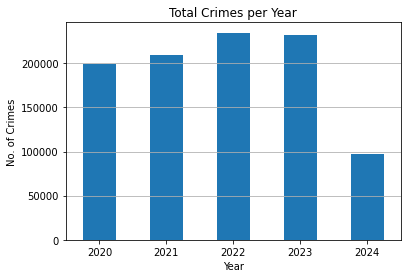

In [10]:
crime_counts.plot(kind='bar', title="Total Crimes per Year").set_facecolor('white')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [11]:
df['Time of Day'] = 'Day' 
df.loc[(df['Time Occ'] >= pd.to_datetime("18:00:00").time()) | (df['Time Occ'] < pd.to_datetime("06:00:00").time()), 'Time of Day'] = 'Night'

In [12]:
df.head()

Date Rptd   Date Occ  Time Occ  Area  Area Name  Rpt Dist No  Part 1-2  \
0 2020-03-01 2020-03-01  21:30:00     7   Wilshire          784         1   
1 2020-02-09 2020-02-08  18:00:00     1    Central          182         1   
2 2020-11-11 2020-11-04  17:00:00     3  Southwest          356         1   
3 2023-05-10 2020-03-10  20:37:00     9   Van Nuys          964         1   
4 2022-08-18 2020-08-17  12:00:00     6  Hollywood          666         2   

   Crm Cd                               Crm Cd Desc             Mo Codes  \
0     510                          VEHICLE - STOLEN                  NaN   
1     330                     BURGLARY FROM VEHICLE       1822 1402 0344   
2     480                             BIKE - STOLEN            0344 1251   
3     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)            0325 1501   
4     354                         THEFT OF IDENTITY  1822 1501 0930 2004   

   Vict Age Vict Sex Vict Descent  Premis Cd  \
0         0        M            O      101.0   
1        47        M            O      128.0   
2        19        X            X      502.0   
3        19        M            O      405.0   
4        28        M            H      102.0   

                                    Premis Desc  Weapon Used Cd Weapon Desc  \
0                                        STREET             NaN         NaN   
1             BUS STOP/LAYOVER (ALSO QUERY 124)             NaN         NaN   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             NaN         NaN   
3                                CLOTHING STORE             NaN         NaN   
4                                      SIDEWALK             NaN         NaN   

  Status   Status Desc  Crm Cd 1  Crm Cd 2  \
0     AA  Adult Arrest     510.0     998.0   
1     IC   Invest Cont     330.0     998.0   
2     IC   Invest Cont     480.0       NaN   
3     IC   Invest Cont     343.0       NaN   
4     IC   Invest Cont     354.0       NaN   

                                   Location Cross Street      Lat       Lon  \
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506   
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628   
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002   
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387   
4                         1900    TRANSIENT          NaN  34.0944 -118.3277   

  Time of Day  
0       Night  
1       Night  
2         Day  
3       Night  
4         Day

In [13]:
df['Time of Day'].value_counts(sort=True)

Time of Day
Day      519173
Night    452539
Name: count, dtype: int64

In [14]:
crime_time = df.groupby([df['Date Occ'].dt.year, 'Time of Day']).size().unstack()

In [15]:
crime_time

Time of Day     Day   Night
Date Occ                   
2020         105787   93359
2021         110884   98394
2022         125904  108645
2023         124103  107317
2024          52495   44824

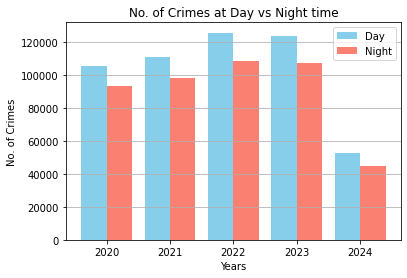

In [16]:
X_axis = np.arange(len(crime_time)) 
  
plt.bar(x = X_axis - 0.2, height = crime_time['Day'], width = 0.4, label = 'Day', color='skyblue') 
plt.bar(x = X_axis + 0.2, height = crime_time['Night'], width= 0.4, label = 'Night', color='salmon') 
  
plt.xticks(X_axis, crime_time.index.values)
plt.xlabel("Years") 
plt.ylabel("No. of Crimes") 
plt.title("No. of Crimes at Day vs Night time") 
plt.grid(axis='y')
plt.legend() 
plt.show() 

In [78]:
day_crimes = df.groupby(['Time of Day'])['Crm Cd Desc'].value_counts(sort=True)['Day'].head(10)

In [18]:
night_crimes = df.groupby('Time of Day')['Crm Cd Desc'].value_counts(sort=True)['Night'].head(10)

In [19]:

day_cmn_crm = ['Stolen Vehicle' ,'Theft of Identity', 'Simple Assault', 'Theft (<950$)', 'Vandalism - Felony (>400$)', 'Burglary', 'Assault with Deadly Weapon', 'Burglary from Vehicle', 'Theft (>950$)', 'Theft from Vehicle (<950$)']

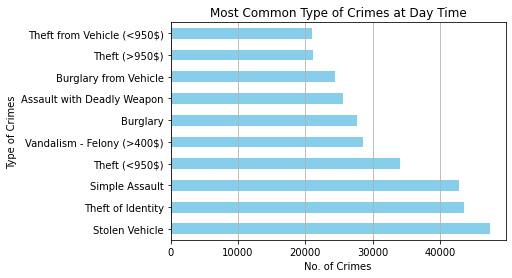

In [79]:
day_crimes.plot(kind='barh', color='skyblue', title="Most Common Type of Crimes at Day Time" )
plt.yticks(np.arange(10), np.array(day_cmn_crm))
plt.xlabel('No. of Crimes')
plt.ylabel("Type of Crimes")
plt.grid(axis='x')
plt.show()



In [21]:
night_cmn_crm = ['Stolen Vehicle', 'Burglary from Vehicle', 'Simlpe Assault', 'Vandalism - Felony (>400$)', 'Burglary', 'Assault with Deadly Weapon', 'Assault - Intimate Partner', 'Theft from Vehicle (>950$)', 'Theft from Vehicle (<950$)','Theft of Identity' ]

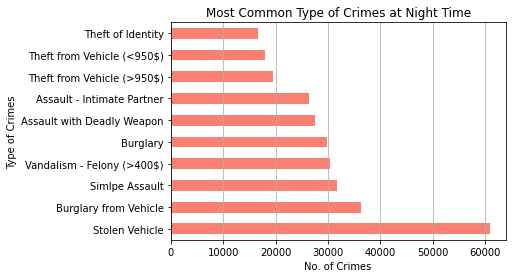

In [22]:
night_crimes.plot(kind='barh', color='salmon', title="Most Common Type of Crimes at Night Time" )
plt.yticks(np.arange(10), np.array(night_cmn_crm))
plt.xlabel('No. of Crimes')
plt.ylabel("Type of Crimes")
plt.grid(axis='x')
plt.show()


In [23]:
filtered_data = df.loc[
    (df['Vict Sex'].isin(['M','F'])) &
    (df['Vict Descent'].isin(['H','W','B']))
]

In [24]:
vict_dsct_gend = filtered_data.groupby(['Vict Descent', 'Vict Sex']).size().unstack()

In [25]:
vict_dsct_gend.rename(
    {
        'B':'Black',
        'H':'Hispanic/Latin/Mexican',
        'W':'White'
    },
    inplace=True
)
vict_dsct_gend.rename(
    {
        'F':'Female',
        'M':'Male',
    },
    inplace=True,
    axis=1
)

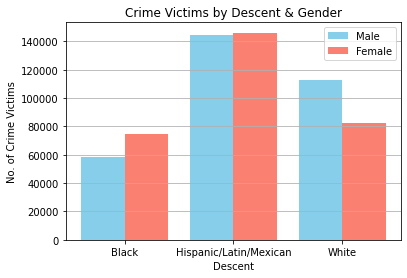

In [26]:
X_axis = np.arange(len(vict_dsct_gend)) 

width = 0.4  

plt.bar(x = X_axis - 0.2, height = vict_dsct_gend['Male'], width = width, label = 'Male', color='skyblue') 
plt.bar(x = X_axis + 0.2, height = vict_dsct_gend['Female'], width= width, label = 'Female', color='salmon') 
  
plt.xticks(X_axis, vict_dsct_gend.index.values)
plt.xlabel("Descent") 
plt.ylabel("No. of Crime Victims") 
plt.title("Crime Victims by Descent & Gender") 
plt.legend() 
plt.grid(axis='y')
plt.show() 

In [27]:
pop = pd.read_csv('Data/la_population.csv')

In [28]:
pop

race    hisp  hispPerc  nonHisp  nonHispPerc    total  totalPerc
0      White  508329    0.1310  1089546       0.2807  1597875     0.4117
1      Other  931485    0.2400    20892       0.0054   952377     0.2454
2  TwoOrMore  370763    0.0955   122728       0.0316   493491     0.1272
3      Asian    6936    0.0018   451785       0.1164   458721     0.1182
4      Black   12402    0.0032   319771       0.0824   332173     0.0856
5     Indian   34542    0.0089     6153       0.0016    40695     0.0105
6   Hawaiian    1306    0.0003     4403       0.0011     5709     0.0015

In [29]:
pop_clean = pd.DataFrame([pop['hisp'].sum(), (pop.loc[0,'total'] - pop.loc[0,'hisp']),( pop.loc[4,'total'] - pop.loc[4,'hisp'] )] , index=['H', 'W', 'B' ], columns=['Total'])

In [30]:
pop_clean

Total
H  1865763
W  1089546
B   319771

In [31]:
vct_by_pop = pd.DataFrame(df['Vict Descent'].value_counts(sort=True).head(3))

In [32]:
vct_by_pop['Total'] = pop_clean
vct_by_pop.rename(index={
    'B':'Black',
    'H':'Hispanic/Latin/Mexican',
    'W':'White'},inplace=True)
vct_by_pop

count    Total
Vict Descent                           
Hispanic/Latin/Mexican  290950  1865763
White                   195553  1089546
Black                   133526   319771

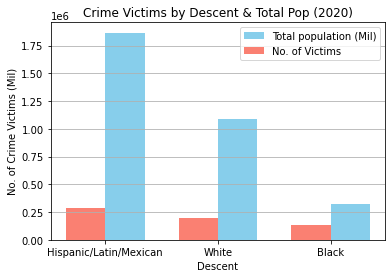

In [33]:
X_axis = np.arange(len(vct_by_pop)) 

width = 0.35  

plt.bar(x = X_axis + width/2, height = vct_by_pop['Total'], width= width, label = 'Total population (Mil)', color='skyblue') 
plt.bar(x = X_axis - width/2, height = vct_by_pop['count'], width = width, label = 'No. of Victims', color='salmon') 
  
plt.xticks(X_axis, vct_by_pop.index.values)
plt.xlabel("Descent") 
plt.ylabel("No. of Crime Victims (Mil)") 
plt.title("Crime Victims by Descent & Total Pop (2020)") 
plt.legend() 
plt.grid(axis='y')
plt.show() 

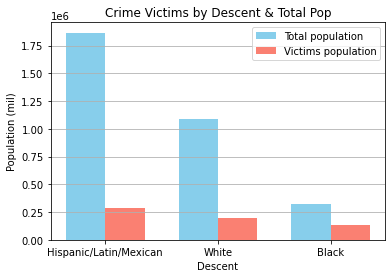

In [34]:
X_axis = np.arange(len(vct_by_pop)) 

width = 0.35  

plt.bar(x = X_axis - width/2, height = vct_by_pop['Total'], width = width, label = 'Total population ', color='skyblue') 
plt.bar(x = X_axis + width/2, height = vct_by_pop['count'], width= width, label = 'Victims population', color='salmon') 
  
plt.xticks(X_axis, vct_by_pop.index.values)
plt.xlabel("Descent") 
plt.ylabel("Population (mil)") 
plt.title("Crime Victims by Descent & Total Pop") 
plt.legend() 
plt.grid(axis='y')
plt.show() 

In [35]:
vct_calc = pd.DataFrame()

In [36]:
vct_calc['Victimization%'] = ((vct_by_pop['count'] / vct_by_pop['Total'])  * 100).round(2)

In [37]:
vct_calc['Population%'] = ((vct_by_pop['Total'] / vct_by_pop['Total'].sum()) * 100).round(2)

In [38]:
vct_calc

Victimization%  Population%
Vict Descent                                       
Hispanic/Latin/Mexican           15.59        56.97
White                            17.95        33.27
Black                            41.76         9.76

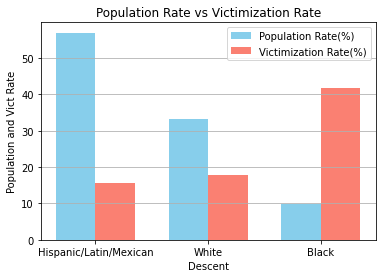

In [56]:
X_axis = np.arange(len(vct_calc)) 

width = 0.35  

plt.bar(x = X_axis - width/2, height = vct_calc['Population%'], width = width, label = 'Population Rate(%)', color='skyblue') 
plt.bar(x = X_axis + width/2, height = vct_calc['Victimization%'], width= width, label = 'Victimization Rate(%)', color='salmon') 
  
plt.xticks(X_axis, vct_calc.index.values)
plt.xlabel("Descent") 
plt.ylabel("Population and Vict Rate") 
plt.title("Population Rate vs Victimization Rate") 
plt.legend() 
plt.grid(axis='y')
plt.show() 

In [57]:
vct_calc

Victimization%  Population%
Vict Descent                                       
Hispanic/Latin/Mexican           15.59        56.97
White                            17.95        33.27
Black                            41.76         9.76

### Ratio Comparisons

To compare the likelihood of being a crime victim:

1. **Black vs. White**:
   $$
   \text{Ratio} = \frac{0.4176}{0.1795} \approx 2.33
   $$
   This means that Black individuals are approximately **2.33 times** more likely to be victims of crime than White individuals.

2. **Black vs. Hispanic/Latin/Mexican**:
   $$
   \text{Ratio} = \frac{0.4176}{0.1559} \approx 2.7
   $$
   This indicates that Black individuals are approximately **2.7 times** more likely to be victims of crime than Hispanic/Latin/Mexican individuals.


Perplexity: Individuals of Black descent are 2.7 times more likely to be crime victims than those of Hispanic descent and 2.3 times more likely than those of White descent, despite constituting only 9.76% of the total population. This underscores the urgent need for targeted interventions to address the underlying factors contributing to these disparities in victimization rates.

In [41]:
df['Reporting Delay'] = (df['Date Rptd'] - df['Date Occ']).dt.days

In [42]:
late_reports = df[df['Reporting Delay'] > 1]

In [75]:
late_rptd_crm = late_reports.groupby('Crm Cd Desc')['Reporting Delay'].mean().round(2).sort_values(ascending=False).head(5)

In [76]:
late_rptd_crm.rename(
    {
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)':'CRM AGNST CHLD' 
    }, inplace=True
)

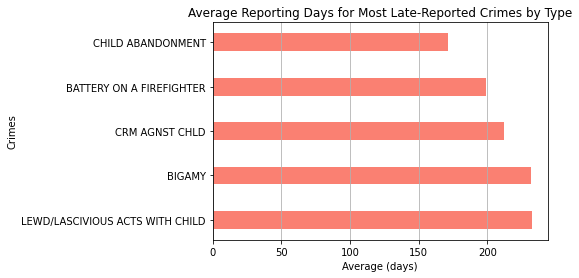

In [77]:
late_rptd_crm.plot(kind='barh', title="Average Reporting Days for Most Late-Reported Crimes by Type", color='salmon',width=0.4 )

plt.xticks(rotation=0)
plt.grid(axis='x')
plt.xlabel('Average (days)')
plt.ylabel('Crimes')
plt.show()


In [48]:
import folium
from folium.plugins import HeatMap

In [49]:
top_crm_area = df.loc[
    df['Area'].isin([1,12,14,3,6])
]

In [50]:
heat_data = [[row['Lat'], row['Lon']] for index, row in top_crm_area.iterrows() ]

In [51]:

# Create a base map
m = folium.Map(location=[top_crm_area['Lat'].mean(),top_crm_area['Lon'].mean()], zoom_start=10)

HeatMap(heat_data, radius=10).add_to(m)


In [52]:
m

In [53]:
crm_by_area = df['Area Name'].value_counts(sort=True).head(5)

In [54]:
crm_by_area.index

Index(['Central', '77th Street', 'Pacific', 'Southwest', 'Hollywood'], dtype='object', name='Area Name')

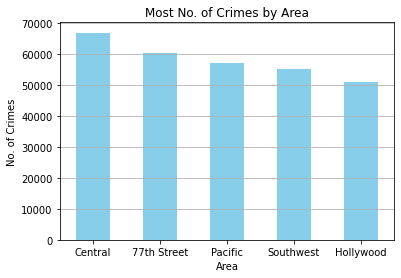

In [55]:
crm_by_area.plot(kind='bar', title='Most No. of Crimes by Area', color='skyblue')

plt.xticks(rotation=0)
plt.xlabel('Area')
plt.ylabel('No. of Crimes')
plt.grid(axis='y')
plt.show()

